In [109]:
from mnist import MNIST
import numpy as np, scipy, seaborn as sns
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

     0      1      2      3      4      5      6      7      8      9


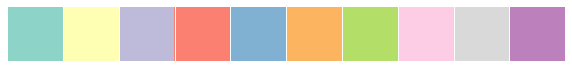

In [180]:
sns.palplot(sns.color_palette("Set3", n_colors=10, desat=1))
print "     " + "      ".join(str(w) for w in xrange(10))

In [2]:
mndata = MNIST('../data')
TrainingData = mndata.load_training()
TestData     = mndata.load_testing()

In [3]:
X_train = np.array(TrainingData[0])
Y_train = np.array(TrainingData[1])
X_test  = np.array(TestData[0])
Y_test  = np.array(TestData[1])

the number shoud be 5


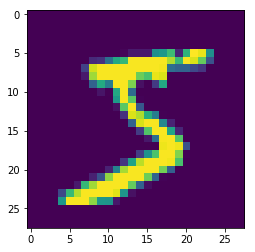

In [24]:
def Visualize(a):
    data = a.reshape((28, 28))
    imshow(data)
Visualize(X_train[0])
print "the number shoud be", Y_train[0]

In [244]:
X_std = StandardScaler().fit_transform(X_train)

Test sklearn.decomposition.PCA

In [355]:
def printc(cc):
    sns.palplot(cc)
    print "     " + "      ".join(str(w) for w in xrange(10))

def minist_plot_2d(x, y, label=Y_train, num = 10000, fs=(10, 10), cc = sns.color_palette("Set3", n_colors=10, desat=1)):
    printc(cc)
    fig = plt.figure(figsize=fs)
    plt.scatter(x[:num], y[:num], c=[cc[w] for w in label[:num]], marker='o', s = 7)

def minist_plot_3d(x, y, z, label=Y_train, num = 10000, fs=(10, 10), cc = sns.color_palette("Set3", n_colors=10, desat=1)):
    printc(cc)
    fig = plt.figure(figsize=fs)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:num], y[:num], z[:num], c=[cc[w] for w in label[:num]], marker='o', s = 7)

In [348]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_std.T)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [349]:
pca_score = pca.explained_variance_ratio_
V = pca.components_
print pca_score, V.shape

[ 0.04677605  0.04143171  0.0381674 ] (3L, 60000L)


     0      1      2      3      4      5      6      7      8      9


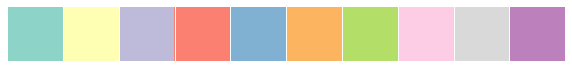

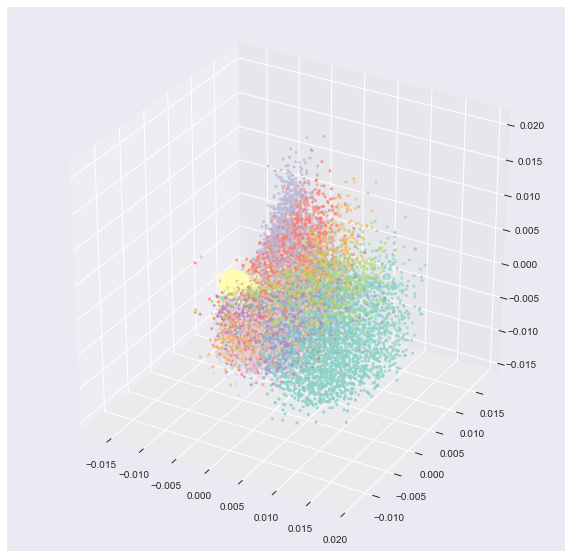

In [351]:
minist_plot_3d(V[0], V[1], V[2], num=30000)

In [357]:
pca = PCA(n_components=2)
pca.fit(X_std.T)
pca_score = pca.explained_variance_ratio_
V = pca.components_

     0      1      2      3      4      5      6      7      8      9


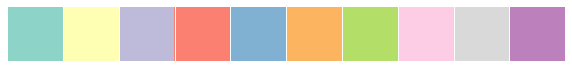

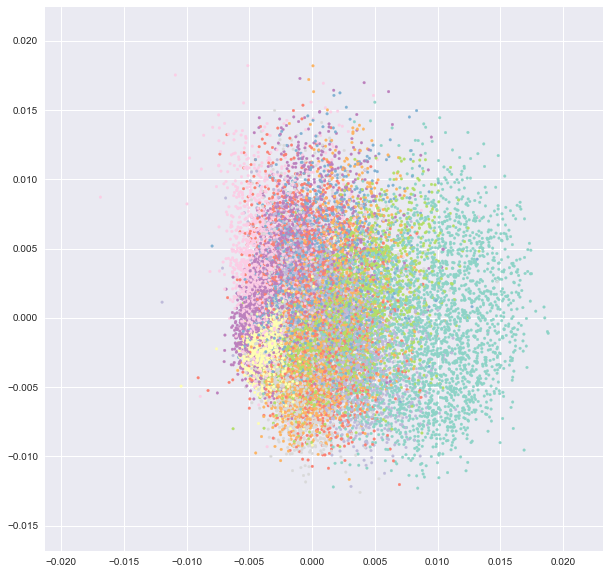

In [358]:
minist_plot_2d(V[0], V[1], num=30000)

Test SVD PCA

In [292]:
u,s,v = scipy.sparse.linalg.svds(X_std, k=3)
print u.shape, s.shape, v.shape

(60000L, 3L) (3L,) (3L, 784L)


     0      1      2      3      4      5      6      7      8      9


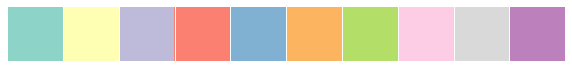

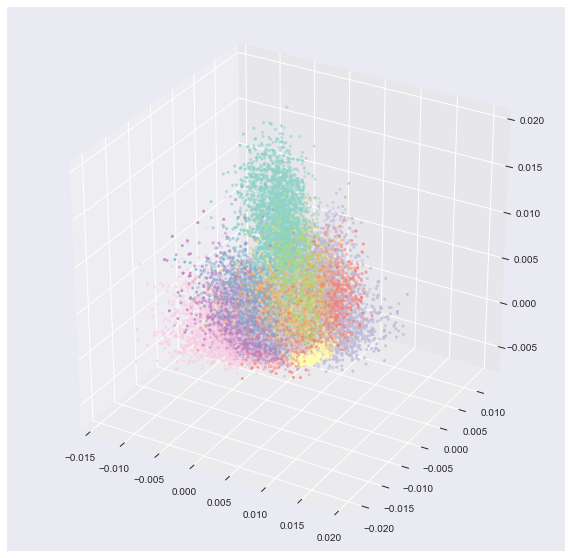

In [293]:
sns.palplot(sns.color_palette("Set3", n_colors=10, desat=1))
print "     " + "      ".join(str(w) for w in xrange(10))
num = 30000
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u.T[0][:num], u.T[1][:num], u.T[2][:num], num=30000)

In [295]:
u,s,v = scipy.sparse.linalg.svds(X_std, k=2)
print u.shape, s.shape, v.shape

(60000L, 2L) (2L,) (2L, 784L)


     0      1      2      3      4      5      6      7      8      9


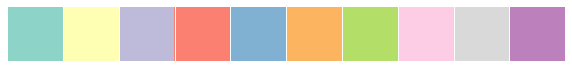

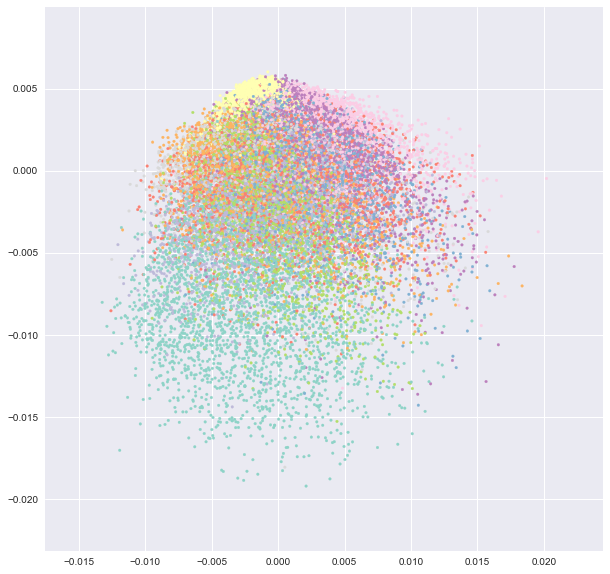

In [296]:
sns.palplot(sns.color_palette("Set3", n_colors=10, desat=1))
print "     " + "      ".join(str(w) for w in xrange(10))
num = 30000
fig = plt.figure(figsize=(10, 10))
plt.scatter(u.T[0][:num], u.T[1][:num], \
           c=[sns.color_palette("Set3", n_colors=10, desat=1)[w] for w in Y_train[:num]],\
           marker='o', s = 7)

Normal Approach

In [320]:
cov_mat = np.cov(X_std.T)
print('NumPy covariance matrix: \n%s' %cov_mat)

NumPy covariance matrix: 
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [321]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

temp = sorted([(eig_vals[i], eig_vecs[i]) for i in xrange(len(eig_vals))], key = lambda x: abs(x[0]), reverse = True)
eig_vals = np.array([w[0] for w in temp])
eig_vecs = np.array([w[1] for w in temp])

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]

Eigenvalues 
[  4.04876351e+01   2.92416975e+01   2.68118045e+01   2.06866182e+01
   1.80766501e+01   1.57331779e+01   1.37906091e+01   1.25175891e+01
   1.10067953e+01   1.00504971e+01   9.62045779e+00   8.63097356e+00
   7.99159687e+00   7.81488215e+00   7.37553786e+00   7.13058751e+00
   6.71398002e+00   6.60400749e+00   6.40604846e+00   6.23737743e+00
   5.93229172e+00   5.76059855e+00   5.48403364e+00   5.31859721e+00
   5.12873534e+00   4.96062446e+00   4.90533662e+00   4.70843497e+00
   4.52919760e+00   4.39470849e+00   4.27522172e+00   4.21399693e+00
   4.09838079e+00   4.03181137e+00   3.97713624e+00   3.86052409e+00
   3.80864021e+00   3.72563426e+00   3.64393543e+00   3.44169730e+00
   3.41624517e+00   3.36378527e+00   3.25773631e+00   3.23620323e+00
   3.20478100

In [322]:
eig_vecs.shape

(784L, 784L)

     0      1      2      3      4      5      6      7      8      9


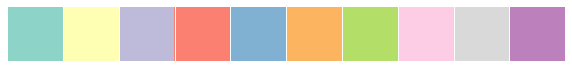

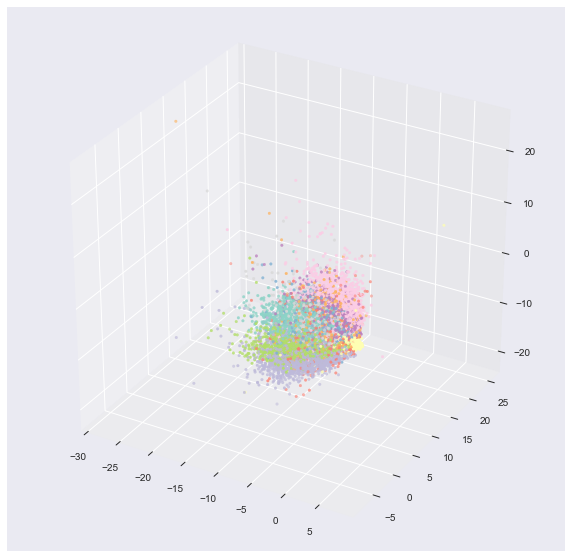

In [323]:
X_transformed = X_std.dot(eig_vecs.T[:3].T)

sns.palplot(sns.color_palette("Set3", n_colors=10, desat=1))
print "     " + "      ".join(str(w) for w in xrange(10))
num = 30000
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_transformed[:num, 0], X_transformed[:num, 1], X_transformed[:num, 2],\
           c=[sns.color_palette("Set3", n_colors=10, desat=1)[w] for w in Y_train[:num]],\
           marker='o', s = 7)

     0      1      2      3      4      5      6      7      8      9


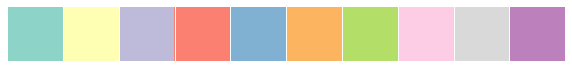

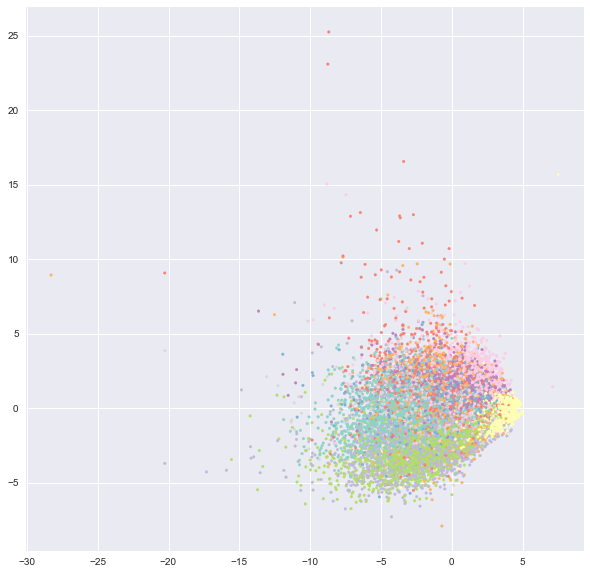

In [324]:
X_transformed = X_std.dot(eig_vecs.T[:2].T)

sns.palplot(sns.color_palette("Set3", n_colors=10, desat=1))
print "     " + "      ".join(str(w) for w in xrange(10))
num = 30000
fig = plt.figure(figsize=(10, 10))
plt.scatter(X_transformed[:num, 0], X_transformed[:num, 1], \
           c=[sns.color_palette("Set3", n_colors=10, desat=1)[w] for w in Y_train[:num]],\
           marker='o', s = 7)

In [329]:
from sklearn.manifold import TSNE
model = TSNE(n_components=3, random_state=0)
np.set_printoptions(suppress=True)
embed = model.fit_transform(X_std[:10000])

     0      1      2      3      4      5      6      7      8      9


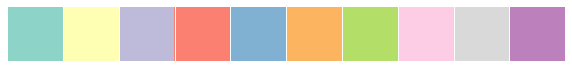

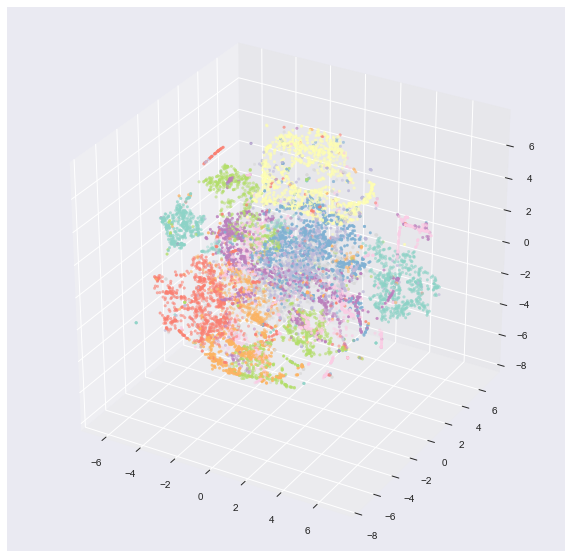

In [330]:
sns.palplot(sns.color_palette("Set3", n_colors=10, desat=1))
print "     " + "      ".join(str(w) for w in xrange(10))
num = 10000
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embed[:,0], embed[:,1], embed[:,2], \
           c=[sns.color_palette("Set3", n_colors=10, desat=1)[w] for w in Y_train[:num]],\
           marker='o', s = 7)

In [331]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
embed = model.fit_transform(X_std[:10000])

     0      1      2      3      4      5      6      7      8      9


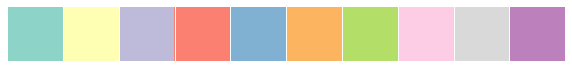

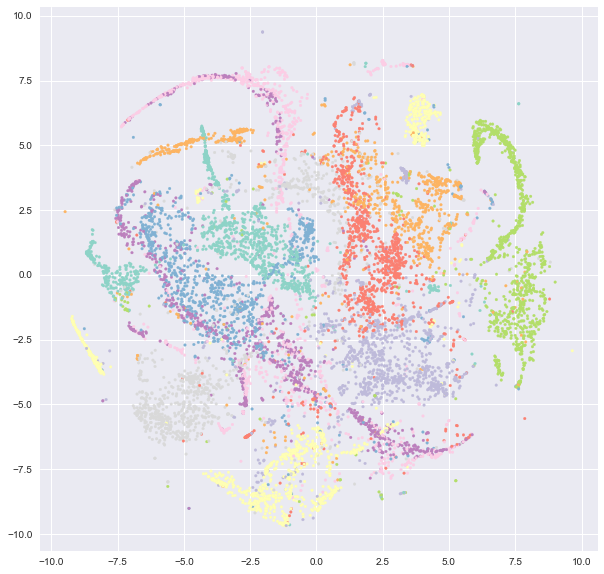

In [332]:
sns.palplot(sns.color_palette("Set3", n_colors=10, desat=1))
print "     " + "      ".join(str(w) for w in xrange(10))
num = 10000
fig = plt.figure(figsize=(10, 10))
plt.scatter(embed[:,0], embed[:,1], \
           c=[sns.color_palette("Set3", n_colors=10, desat=1)[w] for w in Y_train[:num]],\
           marker='o', s = 7)